# Bối cảnh và định nghĩa bài toán

Đề xuất các bài nhạc tương tự bài nhạc đầu vào 
Input: 1 bài nhạc
Output: n bài nhạc tương tự (n tự chọn)

# Dữ liệu

https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

# Khám phá dữ liệu


Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Import dataset

In [ ]:
import pandas as pd
data=pd.read_csv('drive/My Drive/dataset/SpotifyFeatures.csv')

5 dòng dữ liệu đầu tiên

In [ ]:
data.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


 0.   genre             
 >Thể loại nhạc
 1.   artist_name       *
 >Tên ca sĩ
 2.   track_name        *
 >tên track 
 3.   track_id          *
 >id
 4.   popularity         
 >độ phổ biến
 5.   acousticness      
> Một thước đo độ tin cậy từ 0,0 đến 1,0 xem bản nhạc có phải là âm thanh hay không. 1,0 thể hiện độ tin cậy cao, bài hát là âm thanh.
 6.   danceability      
> Khả năng khiêu vũ mô tả mức độ phù hợp của một bản nhạc để khiêu vũ dựa trên sự kết hợp của các yếu tố âm nhạc bao gồm nhịp độ, độ ổn định nhịp, độ mạnh của nhịp và sự đều đặn tổng thể. Giá trị 0,0 là ít có thể nhảy nhất và 1,0 là dễ nhảy nhất.
 7.   duration_ms
> Thời lượng của bản nhạc tính bằng mili giây.
 8.   energy
> Năng lượng là một thước đo từ 0,0 đến 1,0 và đại diện cho một thước đo cảm nhận về cường độ và hoạt động. Thông thường, các bản nhạc tràn đầy năng lượng cảm thấy nhanh, ồn ào và ồn ào. Ví dụ, death metal có năng lượng cao, trong khi khúc dạo đầu của Bach cho điểm thấp trên thang điểm. Các đặc điểm cảm nhận đóng góp vào thuộc tính này bao gồm dải động, độ lớn cảm nhận được, âm sắc, tốc độ khởi phát và entropy chung.
 9.   instrumentalness  
> Dự đoán xem một bản nhạc không chứa giọng hát hay không. Âm thanh "ooh" và "aah" được coi như một công cụ trong ngữ cảnh này. Các bản nhạc rap hoặc lời nói rõ ràng là "vocal". Giá trị nhạc cụ càng gần 1,0 thì khả năng bản nhạc không chứa nội dung giọng hát càng cao. Giá trị trên 0,5 nhằm thể hiện các bản nhạc của nhạc cụ, nhưng độ tin cậy cao hơn khi giá trị tiến tới 1,0.
 10.  key*
> Chìa khóa của bản nhạc. Các số nguyên ánh xạ tới các cao độ bằng cách sử dụng ký hiệu Lớp cao độ tiêu chuẩn . Ví dụ: 0 = C, 1 = C♯ / D ♭, 2 = D, v.v. Nếu không có khóa nào được phát hiện, giá trị là -1.
 11.  liveness
> Phát hiện sự hiện diện của khán giả trong bản ghi âm. Giá trị độ sống cao hơn thể hiện xác suất bản nhạc được biểu diễn trực tiếp tăng lên. Giá trị trên 0,8 cung cấp khả năng lớn là bản nhạc đang hoạt động.
 12.  loudness          
> Độ lớn tổng thể của một bản nhạc tính bằng decibel (dB). Giá trị độ ồn được tính trung bình trên toàn bộ bản nhạc và rất hữu ích để so sánh độ ồn tương đối của các bản nhạc. Độ to là chất lượng của âm thanh, tương quan tâm lý chính của sức mạnh thể chất (biên độ). Giá trị thường nằm trong khoảng từ -60 đến 0 db.
 13.  mode             
> Chế độ cho biết thể thức (chính hoặc phụ) của một bản nhạc, loại thang âm mà từ đó nội dung du dương của nó được bắt nguồn. Chính đại diện là 1 và phụ là 0.
 14.  speechiness       
> Tốc độ phát hiện sự hiện diện của các từ được nói trong một bản nhạc. Bản ghi âm càng giống giọng nói độc quyền (ví dụ như chương trình trò chuyện, sách nói, thơ), thì giá trị thuộc tính càng gần với 1,0. Giá trị trên 0,66 mô tả các bản nhạc có thể được tạo hoàn toàn bằng lời nói. Giá trị từ 0,33 đến 0,66 mô tả các bản nhạc có thể chứa cả nhạc và lời nói, theo từng phần hoặc nhiều lớp, bao gồm cả các trường hợp như nhạc rap. Giá trị dưới 0,33 rất có thể đại diện cho âm nhạc và các bản nhạc không giống lời nói khác.
 15.  tempo             
> Tiến độ ước tính tổng thể của một bản nhạc tính bằng nhịp mỗi phút (BPM). Theo thuật ngữ âm nhạc, tempo là tốc độ hoặc nhịp độ của một đoạn nhạc nhất định và bắt nguồn trực tiếp từ thời lượng nhịp trung bình.
 16.  time_signature    *
> Một chữ ký thời gian ước tính. Chữ ký thời gian (mét) là một quy ước ký hiệu để xác định có bao nhiêu nhịp trong mỗi ô nhịp (hoặc thước đo). Chữ ký thời gian nằm trong khoảng từ 3 đến 7 cho biết các chữ ký thời gian là "3/4", đến "7/4".
 17.  valence
> Thước đo từ 0,0 đến 1,0 mô tả tính tích cực trong âm nhạc được truyền tải bởi một bản nhạc. Các bản nhạc có hóa trị cao nghe tích cực hơn (ví dụ: vui vẻ, phấn khởi, hưng phấn), trong khi các bản nhạc có hóa trị thấp âm thanh hơn (ví dụ: buồn, chán nản, tức giận).

In [ ]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Dữ liệu đầy đủ, không có thuộc tính nào bị thiếu dữ liệu

In [ ]:
len(data)

232725

In [ ]:
data.loc[:,'genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

thể loại children's music bị tách do sai chính tả, tiến hành gộp lại

In [ ]:
data.loc[data.loc[:,'genre']=='Children’s Music','genre'] = "Children's Music"
print(data.groupby(['genre']).size())

genre
A Capella             119
Alternative          9263
Anime                8936
Blues                9023
Children's Music    14756
Classical            9256
Comedy               9681
Country              8664
Dance                8701
Electronic           9377
Folk                 9299
Hip-Hop              9295
Indie                9543
Jazz                 9441
Movie                7806
Opera                8280
Pop                  9386
R&B                  8992
Rap                  9232
Reggae               8771
Reggaeton            8927
Rock                 9272
Ska                  8874
Soul                 9089
Soundtrack           9646
World                9096
dtype: int64


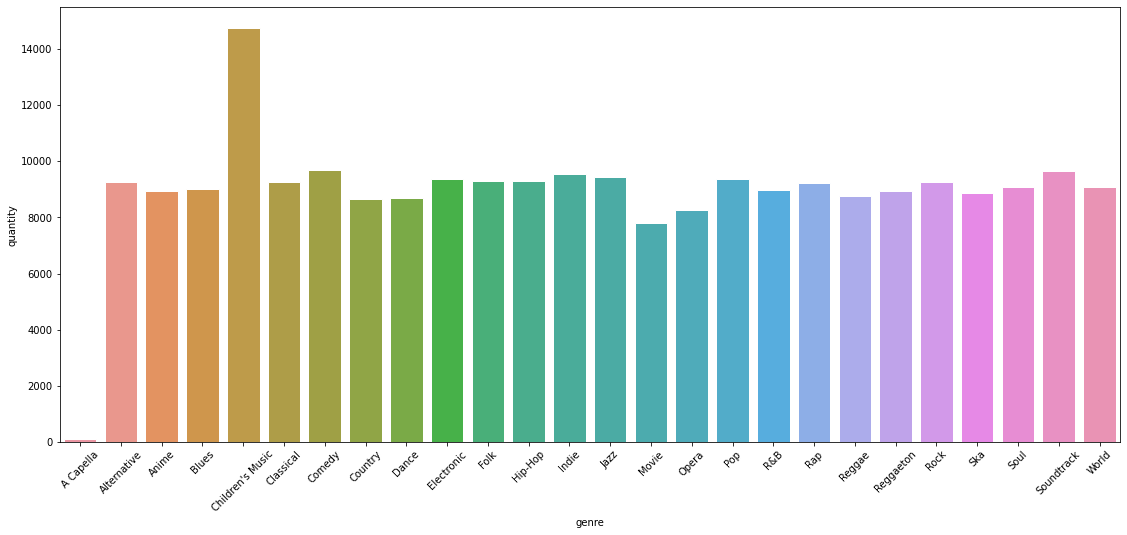

In [ ]:
data_genre=data.groupby(['genre']).size().reset_index(name='quantity')
plt.figure(figsize=(19,8))
plt.xticks(rotation=45)
sns.set_style("ticks")

sns.barplot(data = data_genre, x= 'genre', y= 'quantity')

In [ ]:
for i in data.columns.values:
  print(i,':',data[i].nunique())

genre : 26
artist_name : 14564
track_name : 148615
track_id : 176774
popularity : 101
acousticness : 4734
danceability : 1295
duration_ms : 70749
energy : 2517
instrumentalness : 5400
key : 12
liveness : 1732
loudness : 27923
mode : 2
speechiness : 1641
tempo : 78512
time_signature : 5
valence : 1692


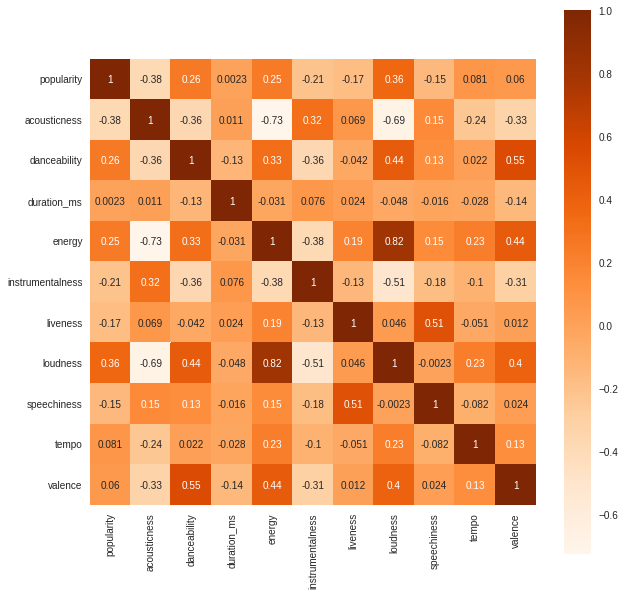

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='Oranges')

# Chuẩn bị dữ liệu

Tập dữ liệu không chứa bất kỳ giá trị nào bị thiếu. Bây giờ chúng ta xem xét mối tương quan giữa các thuộc tính. Tiến hành bỏ một số cột như 'track_id', 'time_signature', 'key', 'mode' vì các cột này không đóng góp nhiều vào các tính năng của một bài hát: 

In [ ]:
df = data.drop(columns=['track_id', 'time_signature', 'key','mode'])
# 'track_name', 'artist_name'

In [ ]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


scale dữ liệu

In [ ]:
#scale dữ liệu
from sklearn.preprocessing import StandardScaler

column_scale=['popularity', 'acousticness', 'danceability', 'duration_ms','energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence']
scaler= StandardScaler()
df[column_scale]=scaler.fit_transform(df[column_scale])

In [ ]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05,2.327250e+05
mean,2.077132e-14,-2.533002e-16,-2.523991e-15,1.170275e-16,1.701792e-15,-8.930111e-14,1.048908e-15,-8.325540e-18,-7.927193e-16,1.524910e-16,5.444042e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.261007e+00,-1.038880e+00,-2.680191e+00,-1.847514e+00,-2.167115e+00,-4.898185e-01,-1.035644e+00,-7.150008e+00,-5.312965e-01,-2.824947e+00,-1.749243e+00
25%,-6.667160e-01,-9.328945e-01,-6.431004e-01,-4.394421e-01,-7.058423e-01,-4.898185e-01,-5.931709e-01,-3.669631e-01,-4.531369e-01,-7.996282e-01,-8.379325e-01
50%,1.029416e-01,-3.849297e-01,8.962731e-02,-1.235571e-01,1.292150e-01,-4.896722e-01,-4.388376e-01,3.014051e-01,-3.809067e-01,-6.112155e-02,-4.197743e-02
75%,7.626480e-01,9.962575e-01,7.415395e-01,2.576659e-01,8.200350e-01,-3.715761e-01,2.470882e-01,6.783521e-01,-8.497840e-02,6.921753e-01,7.885844e-01
max,3.236547e+00,1.768595e+00,2.341688e+00,4.471153e+01,1.624727e+00,2.809741e+00,3.959158e+00,2.219650e+00,4.561473e+00,4.053111e+00,2.095950e+00


OHE cho genre

In [ ]:
#one hot encoder cho genre
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False,handle_unknown='ignore')
encode= onehot.fit_transform(np.array(data['genre']).reshape(-1,1))
#chuyển vector thành dạng bảng
encode=pd.DataFrame(encode)
#thêm tiêu đề cho cột
encode.columns=df['genre'].unique()
encode.head(10)

,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df.drop(columns=['genre'])

In [ ]:
full_df=encode.merge(df,how='inner',left_index=True, right_index=True)

chúng ta sẽ dùng full_df để huấn luyện mô hình

In [ ]:
full_df.head(5)

,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,C'est beau de faire un Show,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Martin & les fées,Perdu d'avance (par Gad Elmaleh),-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Joseph Williams,Don't Let Me Be Lonely Tonight,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,Dis-moi Monsieur Gordon Cooper,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fabien Nataf,Ouverture,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618


# I. K-Means


In [ ]:
#thêm thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#copy data full
data_1=full_df.copy()
#data drop 'track_name', 'artist_name'
data_drop=data_1.copy()
data_drop=data_drop.drop(columns=['artist_name', 'track_name'])

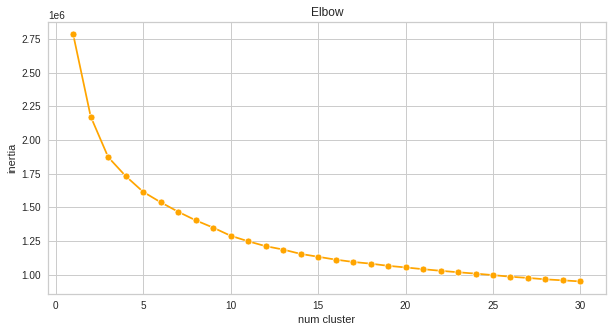

In [ ]:
# hàm vẽ biểu đồ tìm điểm elbow
def visualize_elbow(num_clusters,data_):
  array_inertia=[]
  for i in range(1,num_clusters+1):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42).fit(data_)
    array_inertia.append(kmeans.inertia_)
  #ve bieu do    
  
  plt.figure(figsize=(10,5))
  sns.lineplot(range(1, num_clusters+1), array_inertia,marker='o',color='orange')
  plt.title('Elbow')
  plt.xlabel('num cluster')
  plt.ylabel('inertia')
  plt.show()
#gọi hàm
visualize_elbow(30,data_drop)

In [ ]:
#Hàm vẽ biểu đồ silhouette score
#Hệ số Silhouette chỉ được xác định nếu số lượng nhãn là 2 <= n_labels <= n_samples - 1
def visualize_silhouette_score(start_,end_,data_):
  array_silhouette_score = []
  for i in range(start_,end_+1):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    pred_ = kmeans.fit_predict(data_)
    score_=silhouette_score(data_,pred_)
    array_silhouette_score.append(score_)

  #ve bieu do    
  plt.figure(figsize=(15,10))
  sns.lineplot(range(start_,end_+1), array_silhouette_score, marker='o', color='orange')
  plt.xlabel('num cluster')
  plt.ylabel('silhouette score')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


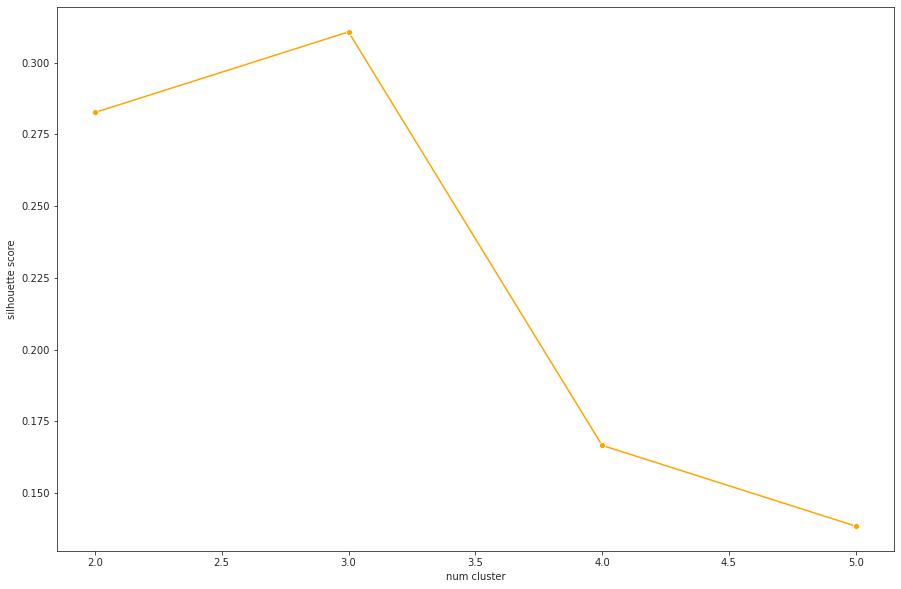

In [ ]:
visualize_silhouette_score(2,5,data_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


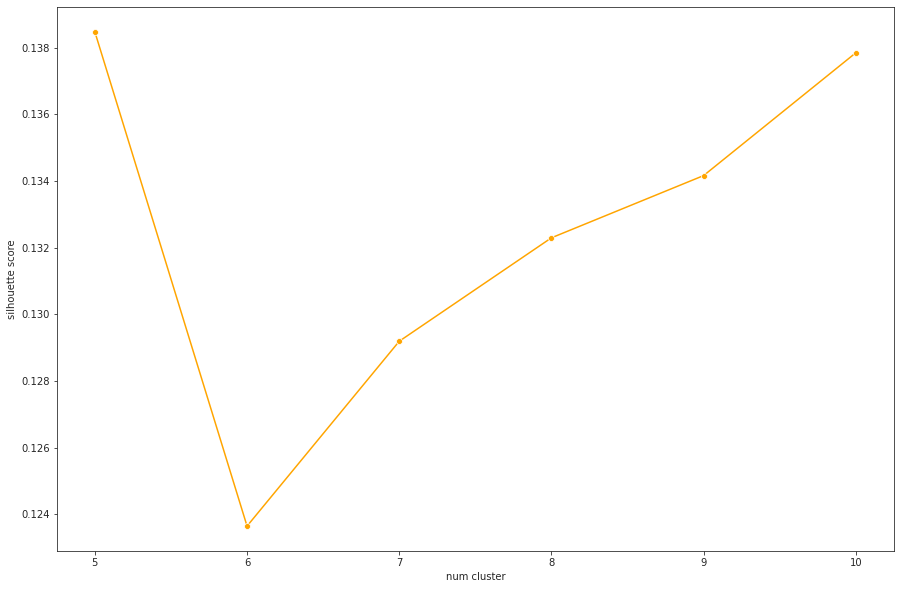

In [ ]:
visualize_silhouette_score(5,10,data_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


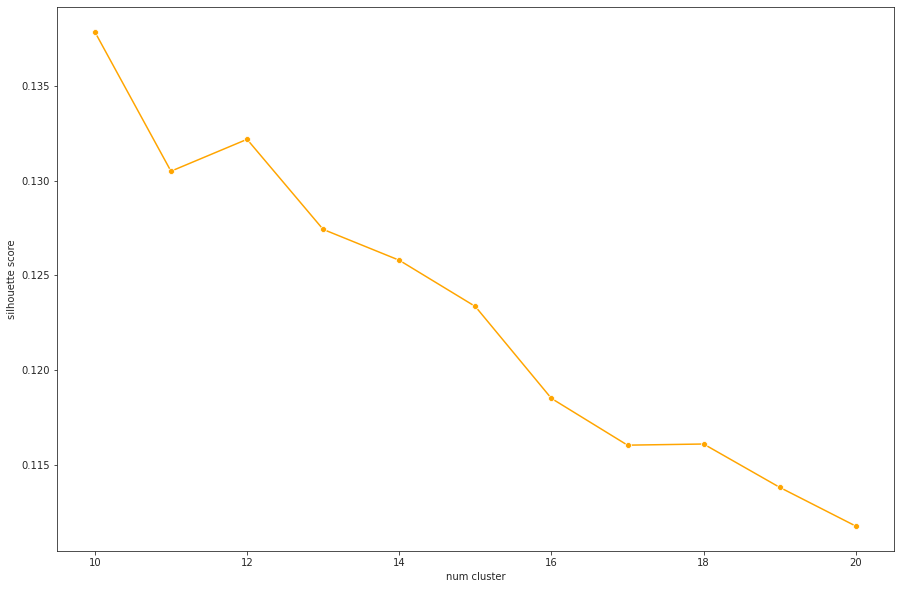

In [ ]:
visualize_silhouette_score(10,20,data_drop)

In [ ]:
#Visualize Silhouette
def SilhouetteVisualize_(num_cluster,data_):
  kmeans = KMeans(n_clusters=num_cluster, init = 'k-means++', random_state=42)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(data_)
  visualizer.show()  

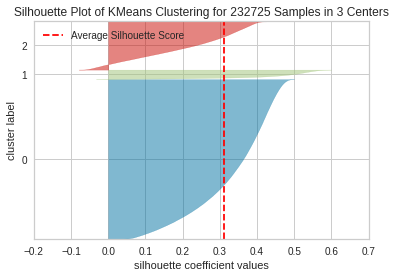

In [ ]:
SilhouetteVisualize_(3,data_drop)

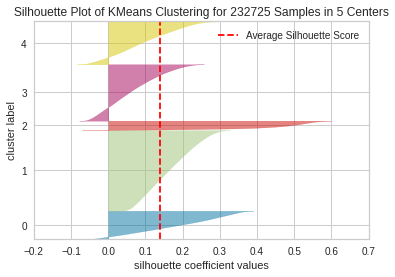

In [ ]:
SilhouetteVisualize_(5,data_drop)

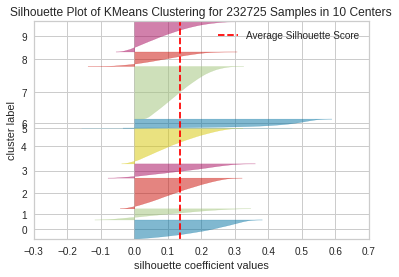

In [ ]:
SilhouetteVisualize_(10,data_drop)

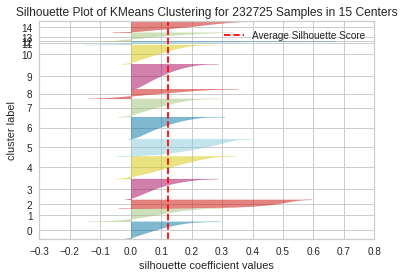

In [ ]:
SilhouetteVisualize_(15,data_drop)

Chọn num_clust=15. Tiến hành phân cụm

In [ ]:
num_clust = 15
kmeans = KMeans(n_clusters = num_clust, init = 'k-means++', random_state = 42)
pred_ = kmeans.fit_predict(data_drop)
data_1.loc[:, 'cluster'] = pred_

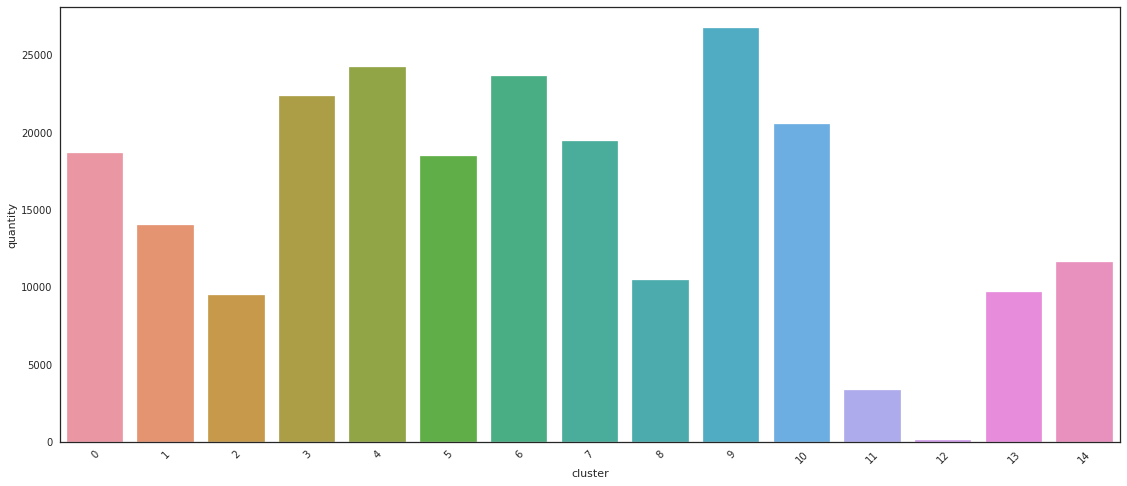

In [ ]:
temp_1=data_1.groupby(['cluster']).size().reset_index(name='quantity')
plt.figure(figsize=(19,8))
plt.xticks(rotation=45)
sns.set_style("ticks")

sns.barplot(data = temp_1, x= 'cluster', y= 'quantity')

In [ ]:
data_1.head(5)

,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,C'est beau de faire un Show,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Martin & les fées,Perdu d'avance (par Gad Elmaleh),-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Joseph Williams,Don't Let Me Be Lonely Tonight,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,Dis-moi Monsieur Gordon Cooper,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384,14
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fabien Nataf,Ouverture,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618,14


# II. Gausian Mixture (GMM)


In [ ]:
#thu vien
from sklearn.mixture import GaussianMixture

In [ ]:
#copy data full
data_2=full_df.copy()
#data drop 'track_name', 'artist_name'
data_drop_2=data_2.copy()
data_drop_2=data_drop_2.drop(columns=['artist_name', 'track_name'])

In [ ]:
#Hàm vẽ biểu đồ BIC AIC
def visualize_BIC_AIC_score(start_,end_,data_):
  array_n_components = np.arange(start_, end_+1)
  array_BIC_score = []
  array_AIC_score = []
  for i in range(start_,end_+1):
    gm = GaussianMixture(n_components=i, random_state=42).fit(data_)
    bic_score = gm.bic(data_)
    aic_score = gm.aic(data_)
    array_BIC_score.append(bic_score)
    array_AIC_score.append(aic_score)
  #tao dataframe
  gmm_comparisons=pd.DataFrame({"n_components" : array_n_components, "BIC" : array_BIC_score , "AIC" : array_AIC_score})
  #ve bieu do    
  plt.figure(figsize=(15,10))
  sns.lineplot(data=gmm_comparisons[["BIC","AIC"]],marker='o',color='orange')
  plt.xlabel("Number of Clusters")
  plt.ylabel("Score")
  plt.show()

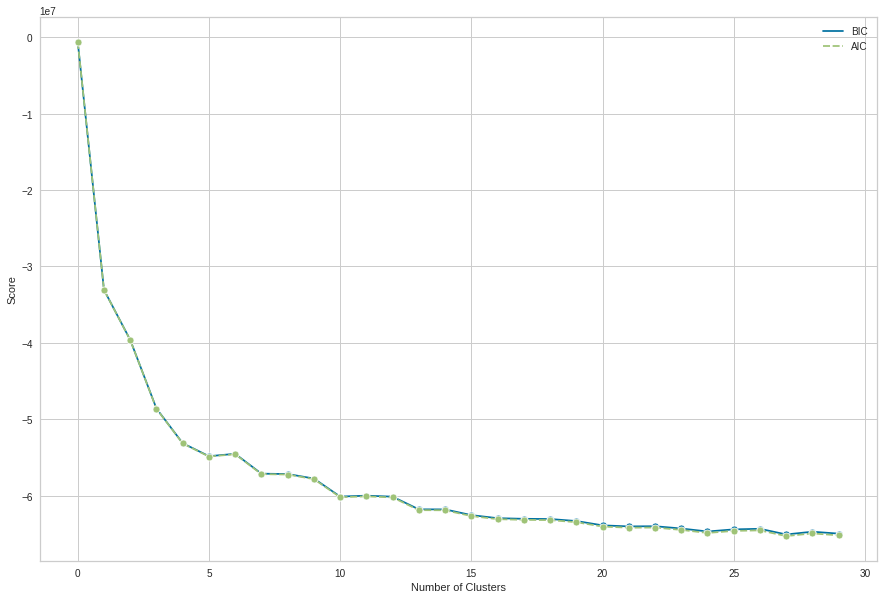

In [ ]:
visualize_BIC_AIC_score(1,30,data_drop_2)

Chọn n_components= 15

Tiến hành phân cụm

In [ ]:
num_clust = 15
gm = GaussianMixture(n_components=num_clust, random_state=42).fit(data_drop_2)
gm_pred = gm.predict(data_drop_2)
data_2.loc[:, 'cluster'] = gm_pred

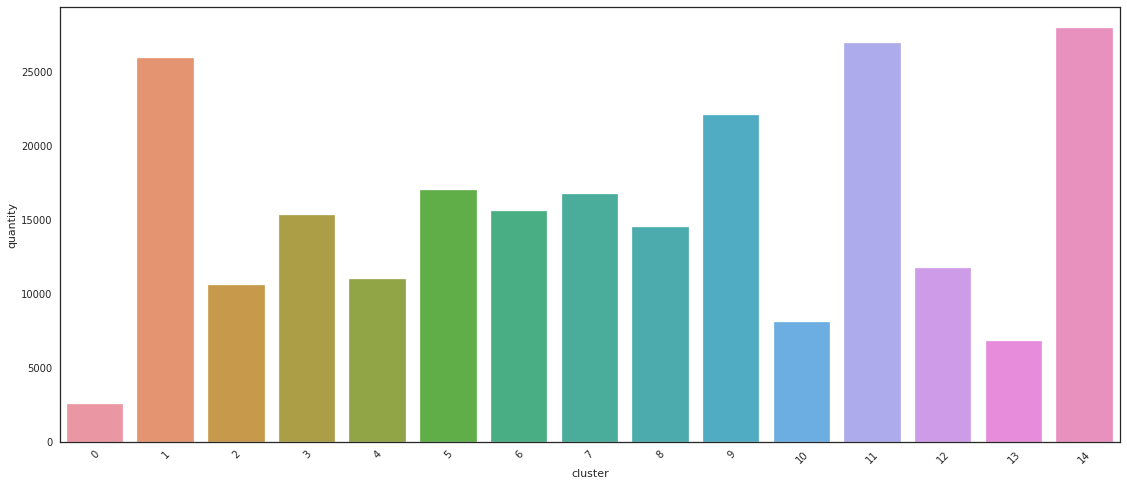

In [ ]:
temp=data_2.groupby(['cluster']).size().reset_index(name='quantity')
plt.figure(figsize=(19,8))
plt.xticks(rotation=45)
sns.set_style("ticks")

sns.barplot(data = temp, x= 'cluster', y= 'quantity')

In [ ]:
data_2.head(5)

,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,C'est beau de faire un Show,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Martin & les fées,Perdu d'avance (par Gad Elmaleh),-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Joseph Williams,Don't Let Me Be Lonely Tonight,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Henri Salvador,Dis-moi Monsieur Gordon Cooper,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fabien Nataf,Ouverture,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618,1


# III. BIRCH


In [ ]:
#thêm thư viện
from sklearn.cluster import Birch

In [ ]:
#copy data full
data_3=full_df.copy()
#data drop 'track_name', 'artist_name'
data_drop_3 = data_3.copy()
data_drop_3 = data_drop_3.drop(columns=['artist_name', 'track_name'])


Huấn luyện mô hình


In [ ]:
birch_clustering = Birch(threshold = 3.0,branching_factor = 200,n_clusters = None )
birch_clusters = birch_clustering.fit_predict(data_drop_3)
data_3.loc[:, 'cluster'] = birch_clusters

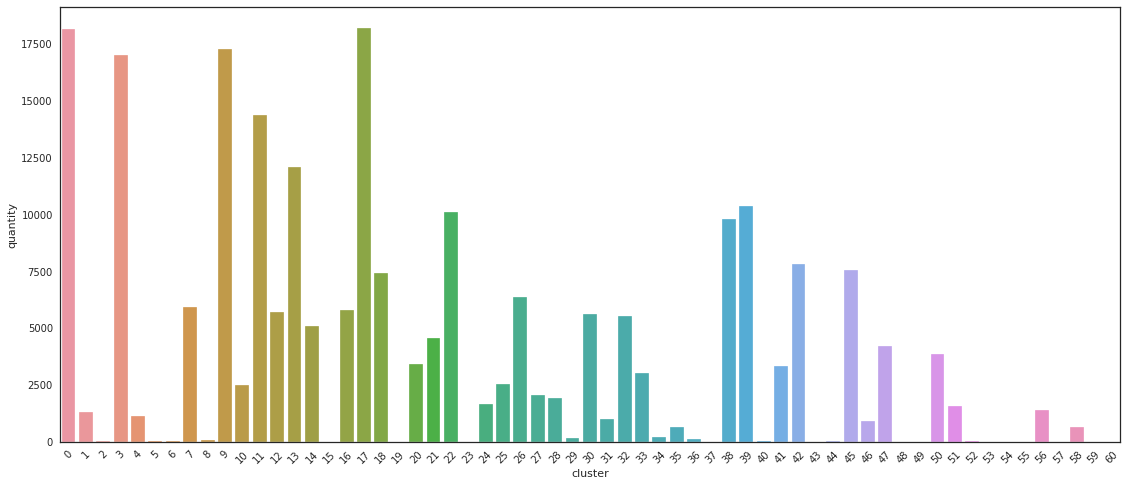

In [ ]:
temp=data_3.groupby(['cluster']).size().reset_index(name='quantity')
plt.figure(figsize=(19,8))
plt.xticks(rotation=45)
sns.set_style("ticks")

sns.barplot(data = temp, x= 'cluster', y= 'quantity')

# Hàm đề xuất nhạc

Hàm tìm nhạc

In [ ]:
# tìm theo tên bài hát và ca sĩ
def find_song_1(track, artist, data_):
  a=0
  b=False
  index_song=-1
  for i in data_["track_name"]:
    if str(artist).lower() in data_["artist_name"][a].lower() and str(track).lower() in i.lower():
      index_song=a
      print('\t'+str(index_song)+' -- '+str(i)+' -- '+str(data_["artist_name"][a]))
      b=True
    a+=1
  if b==False:
    return 0
  else:
    return 1
# tìm theo tên bài hát
def find_song_2(track, data_):
  a=0
  b=False
  index_song=-1
  for i in data_["track_name"]:
    if str(track).lower() in i.lower():
      index_song=a
      print('\t'+str(index_song)+' -- '+str(i)+' -- '+str(data_["artist_name"][a]))
      b=True
    a+=1
  if b==False:
    return 0
  else:
    return 1
# tìm theo tên ca sĩ
def find_song_3(artist, data_):
  a=0
  b=False
  index_song=-1
  for i in data_["artist_name"]:
    if str(artist).lower() in i.lower():
      index_song=a
      print('\t'+str(index_song)+' -- '+str(i)+' -- '+str(data_["track_name"][a]))
      b=True
    a+=1
  if b==False:
    return 0
  else:
    return 1

Hàm gợi ý nhạc 

In [ ]:
#tìm index của track nếu tìm thấy trả về index, ngược lại trả về -1
def find_index_song(track, artist, data_):
  a=0
  b=False
  index_song=-1
  for i in data_["track_name"]:
    if data_["artist_name"][a].lower() == str(artist).lower() and i.lower() == str(track).lower():
      index_song=a
      b=True
      break
    a+=1
  if b==False:
    return -1
  else:
    return index_song
# trả về các bài hát tương tự
def recommend_music(track, artist,data_,num_top_song):
  temp=find_index_song(track,artist,data_) #index music trong data_
  #kiểm tra xem bài hát có tồn tại không
  if temp==-1:
    #xuất Nothing found nếu bài hát không tồn tại
    print("Nothing found!")
    return 0
  #Nếu tồn tại:
  else:
    #lấy cluster của track
    cluster_ = data_['cluster'].iloc[temp]
    #lấy danh sách tất cả các bài nhạc có cùng cluster_
    data_clust=data_.copy()
    data_clust = data_clust.loc[data_clust.loc[:,'cluster']==cluster_,:]
    
    #thêm cột similarity score
    data_clust.loc[:,'similarity_score']=0
    
    #tính toán similarity score
    data_a = data_.copy().drop(columns=['artist_name','track_name'])
    data_b = data_clust.copy().drop(columns=['artist_name','track_name'])
    for i in range(len(data_clust)):
      a = data_a.iloc[temp,:].values.reshape(1,-1)
      b=data_b.iloc[i, :-1].values.reshape(1,-1)
      data_clust.loc[:,'similarity_score'].iloc[i] = cosine_similarity(a,b)
    #sắp xếp theo similarity score
    list_recommened_music= data_clust.sort_values(by='similarity_score', ascending=False).head(num_top_song+1)
    #trả về 
    return list_recommened_music
#xuất kết quả
def visualize_recommend_music(track, artist,data_,num_top_song):
  music = recommend_music(track, artist,data_,num_top_song)
  a=True
  b=0
  
  for i in music["track_name"]:
    c=0
    str_track=i
    for j in music["artist_name"]:
      if c==b:
        d=0
        str_artist= j
        for k in music["similarity_score"]:
          if d==c:
            str_sc=k
            print('\t'+str(b)+'. '+str_track+' -- '+str_artist +'-- Similarity_score: '+str(str_sc) )
            break
          d=d+1
        break
      c=c+1
    b=b+1
    if a==True:
      print ('\nSimilar songs:\n')
      a=False

# Đề xuất nhạc

Havana -- Camila Cabello

K-means

In [ ]:
visualize_recommend_music('Havana', 'Camila Cabello',data_1,10)

	0. Havana -- Camila Cabello-- Similarity_score: 0.9999999999999998

Similar songs:

	1. The Middle -- Zedd-- Similarity_score: 0.9891165944562652
	2. thank u, next -- Ariana Grande-- Similarity_score: 0.9848380408662974
	3. Can I Be Him -- James Arthur-- Similarity_score: 0.9822786490419635
	4. Now Or Never -- Halsey-- Similarity_score: 0.9814994529279225
	5. I Miss You (feat. Julia Michaels) -- Clean Bandit-- Similarity_score: 0.9807451277795923
	6. Most Girls -- Hailee Steinfeld-- Similarity_score: 0.9803878570485808
	7. Symphony (feat. Zara Larsson) -- Clean Bandit-- Similarity_score: 0.9796145058673689
	8. sweetener -- Ariana Grande-- Similarity_score: 0.9779369861348202
	9. Strip That Down -- Liam Payne-- Similarity_score: 0.9750939155263725
	10. Gasoline -- Halsey-- Similarity_score: 0.9748197976871608


In [ ]:
len(data)

NameError: ignored

GMM

In [ ]:
visualize_recommend_music('Havana', 'Camila Cabello',data_2,10)

	0. Havana -- Camila Cabello-- Similarity_score: 1.0

Similar songs:

	1. The Middle -- Zedd-- Similarity_score: 0.9953679137599837
	2. thank u, next -- Ariana Grande-- Similarity_score: 0.9933747478652799
	3. Can I Be Him -- James Arthur-- Similarity_score: 0.9916430379303841
	4. Most Girls -- Hailee Steinfeld-- Similarity_score: 0.9915346277168483
	5. I Miss You (feat. Julia Michaels) -- Clean Bandit-- Similarity_score: 0.9915253419907493
	6. Now Or Never -- Halsey-- Similarity_score: 0.9911958866789092
	7. Stay (with Alessia Cara) -- Zedd-- Similarity_score: 0.9911169138682211
	8. IDGAF -- Dua Lipa-- Similarity_score: 0.9910562000039139
	9. Symphony (feat. Zara Larsson) -- Clean Bandit-- Similarity_score: 0.9909582153967166
	10. Starving -- Hailee Steinfeld-- Similarity_score: 0.9901138541158355


BIRCH

In [ ]:
visualize_recommend_music('Havana', 'Camila Cabello',data_3,10)

	0. Havana -- Camila Cabello-- Similarity_score: 0.9999999999999999

Similar songs:

	1. The Middle -- Zedd-- Similarity_score: 0.9976334469969484
	2. thank u, next -- Ariana Grande-- Similarity_score: 0.9965822111835994
	3. Can I Be Him -- James Arthur-- Similarity_score: 0.9956078315401348
	4. Stay (with Alessia Cara) -- Zedd-- Similarity_score: 0.9954297323734567
	5. IDGAF -- Dua Lipa-- Similarity_score: 0.9954015480118671
	6. Now Or Never -- Halsey-- Similarity_score: 0.9953636434488664
	7. Symphony (feat. Zara Larsson) -- Clean Bandit-- Similarity_score: 0.9953246038867636
	8. Starving -- Hailee Steinfeld-- Similarity_score: 0.9949519691055098
	9. sweetener -- Ariana Grande-- Similarity_score: 0.9947732293227298
	10. Strip That Down -- Liam Payne-- Similarity_score: 0.9946300246957076


Shape of You - Acoustic -- Ed Sheeran

K-means

In [ ]:
visualize_recommend_music('Shape of You - Acoustic', 'Ed Sheeran',data_1,10)

	0. Shape of You - Acoustic -- Ed Sheeran-- Similarity_score: 0.9999999999999997

Similar songs:

	1. Mi 45 -- El Fantasma-- Similarity_score: 0.9965318033525087
	2. Bella - Remix -- Wolfine-- Similarity_score: 0.9962271374475209
	3. Frontin' (feat. Jay-Z) - Club Mix -- Pharrell Williams-- Similarity_score: 0.9962161682586789
	4. Follow Me -- Uncle Kracker-- Similarity_score: 0.9959584051212456
	5. Quiero -- Joss Favela-- Similarity_score: 0.9955222074903257
	6. While You Count Sheep -- Jon Bellion-- Similarity_score: 0.9954694225933114
	7. Fallin' All In You -- Shawn Mendes-- Similarity_score: 0.9954059836014023
	8. Because Of You -- Ne-Yo-- Similarity_score: 0.9951546300518664
	9. Quién Te Entiende -- Crecer German-- Similarity_score: 0.99412503299043
	10. My Favorite Part -- Mac Miller-- Similarity_score: 0.9940706913219224


GMM

In [ ]:
visualize_recommend_music('Shape of You - Acoustic', 'Ed Sheeran',data_2,10)

	0. Shape of You - Acoustic -- Ed Sheeran-- Similarity_score: 1.0000000000000002

Similar songs:

	1. Mi 45 -- El Fantasma-- Similarity_score: 0.9932539918797957
	2. Bella - Remix -- Wolfine-- Similarity_score: 0.9926841272438959
	3. Frontin' (feat. Jay-Z) - Club Mix -- Pharrell Williams-- Similarity_score: 0.9926524942134473
	4. Follow Me -- Uncle Kracker-- Similarity_score: 0.9921015678195069
	5. While You Count Sheep -- Jon Bellion-- Similarity_score: 0.9914772420944561
	6. Quiero -- Joss Favela-- Similarity_score: 0.991420168291005
	7. Fallin' All In You -- Shawn Mendes-- Similarity_score: 0.9910563251144725
	8. Because Of You -- Ne-Yo-- Similarity_score: 0.9905529442513523
	9. Quién Te Entiende -- Crecer German-- Similarity_score: 0.9885240158900894
	10. My Favorite Part -- Mac Miller-- Similarity_score: 0.9884109081804591


BIRCH

In [ ]:
visualize_recommend_music('Shape of You - Acoustic', 'Ed Sheeran',data_3,10)

	0. Shape of You - Acoustic -- Ed Sheeran-- Similarity_score: 0.9999999999999997

Similar songs:

	1. Mi 45 -- El Fantasma-- Similarity_score: 0.9965318033525087
	2. Bella - Remix -- Wolfine-- Similarity_score: 0.9962271374475209
	3. Frontin' (feat. Jay-Z) - Club Mix -- Pharrell Williams-- Similarity_score: 0.9962161682586789
	4. Follow Me -- Uncle Kracker-- Similarity_score: 0.9959584051212456
	5. Fallin' All In You -- Shawn Mendes-- Similarity_score: 0.9954059836014023
	6. Because Of You -- Ne-Yo-- Similarity_score: 0.9951546300518664
	7. Me & U -- Cassie-- Similarity_score: 0.9940390683263053
	8. That's How You Know (feat. Kid Ink & Bebe Rexha) -- Nico & Vinz-- Similarity_score: 0.993748299981799
	9. Fresh Eyes -- Andy Grammer-- Similarity_score: 0.9936704063748215
	10. Vengo a Aclarar (En Vivo) -- El Fantasma-- Similarity_score: 0.9936066443420459


SICKO MODE -- Travis Scott

K-means

In [ ]:
visualize_recommend_music('SICKO MODE','Travis Scott',data_1,10)

	0. SICKO MODE -- Travis Scott-- Similarity_score: 0.9999999999999999

Similar songs:

	1. Walk It Talk It -- Migos-- Similarity_score: 0.98267751588855
	2. Wasted (feat. Lil Uzi Vert) -- Juice WRLD-- Similarity_score: 0.9779989994610375
	3. Lucky You (feat. Joyner Lucas) -- Eminem-- Similarity_score: 0.9776894151657167
	4. I Get The Bag (feat. Migos) -- Gucci Mane-- Similarity_score: 0.9679612076667595
	5. SICKO MODE - Skrillex Remix -- Travis Scott-- Similarity_score: 0.9678262616393658
	6. No Limit -- G-Eazy-- Similarity_score: 0.9672865805265809
	7. MAMA (feat. Nicki Minaj, Kanye West) -- 6ix9ine-- Similarity_score: 0.9649909452674863
	8. Codeine Dreaming (feat. Lil Wayne) -- Kodak Black-- Similarity_score: 0.9644592143853921
	9. Black Beatles -- Rae Sremmurd-- Similarity_score: 0.9631171081640051
	10. XO TOUR Llif3 -- Lil Uzi Vert-- Similarity_score: 0.9630754181543173


GMM

In [ ]:
visualize_recommend_music('SICKO MODE','Travis Scott',data_2,10)

	0. SICKO MODE -- Travis Scott-- Similarity_score: 1.0000000000000002

Similar songs:

	1. Walk It Talk It -- Migos-- Similarity_score: 0.988955909934553
	2. Lucky You (feat. Joyner Lucas) -- Eminem-- Similarity_score: 0.9862917574932143
	3. Wasted (feat. Lil Uzi Vert) -- Juice WRLD-- Similarity_score: 0.9846170870290183
	4. No Limit -- G-Eazy-- Similarity_score: 0.9799528146877393
	5. I Get The Bag (feat. Migos) -- Gucci Mane-- Similarity_score: 0.9794683622179551
	6. SICKO MODE - Skrillex Remix -- Travis Scott-- Similarity_score: 0.9793217521071279
	7. MAMA (feat. Nicki Minaj, Kanye West) -- 6ix9ine-- Similarity_score: 0.977500268766424
	8. XO TOUR Llif3 -- Lil Uzi Vert-- Similarity_score: 0.9770487411060803
	9. No Stylist -- French Montana-- Similarity_score: 0.9769576119141627
	10. Powerglide (feat. Juicy J) - From SR3MM -- Rae Sremmurd-- Similarity_score: 0.9764238342098296


BIRCH

In [ ]:
visualize_recommend_music('SICKO MODE','Travis Scott',data_3,10)

	0. SICKO MODE -- Travis Scott-- Similarity_score: 1.0000000000000002

Similar songs:

	1. Walk It Talk It -- Migos-- Similarity_score: 0.9996710056515051
	2. Lucky You (feat. Joyner Lucas) -- Eminem-- Similarity_score: 0.9996105196613255
	3. Wasted (feat. Lil Uzi Vert) -- Juice WRLD-- Similarity_score: 0.9995021175472485
	4. No Limit -- G-Eazy-- Similarity_score: 0.9994326497508224
	5. I Get The Bag (feat. Migos) -- Gucci Mane-- Similarity_score: 0.9993881937201776
	6. SICKO MODE - Skrillex Remix -- Travis Scott-- Similarity_score: 0.9993820739760885
	7. XO TOUR Llif3 -- Lil Uzi Vert-- Similarity_score: 0.999338960683011
	8. No Stylist -- French Montana-- Similarity_score: 0.9993335732530327
	9. Powerglide (feat. Juicy J) - From SR3MM -- Rae Sremmurd-- Similarity_score: 0.9993325804953654
	10. MAMA (feat. Nicki Minaj, Kanye West) -- 6ix9ine-- Similarity_score: 0.9993284063333707
